In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [3]:
l1 = lambda r, u, a0, a1, x :\
    r - 2*u*x**2 - np.sqrt((u**2+a1**2)*x**4 - (a0 - 2*a1*x**2)**2 + 0j)
l2 = lambda r, u, a0, a1, x :\
    r - 2*u*x**2 + np.sqrt((u**2+a1**2)*x**4 - (a0 - 2*a1*x**2)**2 + 0j)

In [13]:
m = 4
a = np.linspace(0, 3, m)
a, b = np.meshgrid(a, a)
a = a.flatten()
b = b.flatten()
a = list(zip(a, b))

/tmp/ipykernel_319107/4002514332.py:42: RuntimeWarning: invalid value encountered in double_scalars
  level1 = np.min((1., a0/a1))
/tmp/ipykernel_319107/4002514332.py:43: RuntimeWarning: invalid value encountered in double_scalars
  level2 = np.max((1., a0/a1))
/tmp/ipykernel_319107/4002514332.py:46: UserWarning: No contour levels were found within the data range.
  ax2[n].contour(x, y, x**2 + y**2, levels=levels, colors='black')
/tmp/ipykernel_319107/4002514332.py:49: UserWarning: No contour levels were found within the data range.
  ax2[n].contour(x, y, x**2 + y**2, levels=levels, colors='red')
/tmp/ipykernel_319107/4002514332.py:28: RuntimeWarning: invalid value encountered in sqrt
  phi0p = np.sqrt(a0/(3*a1**2-u**2) * (2*a1 + np.sqrt(a1**2 + u**2)))
/tmp/ipykernel_319107/4002514332.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  level1 = np.min((1., a0/a1))
/tmp/ipykernel_319107/4002514332.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  l

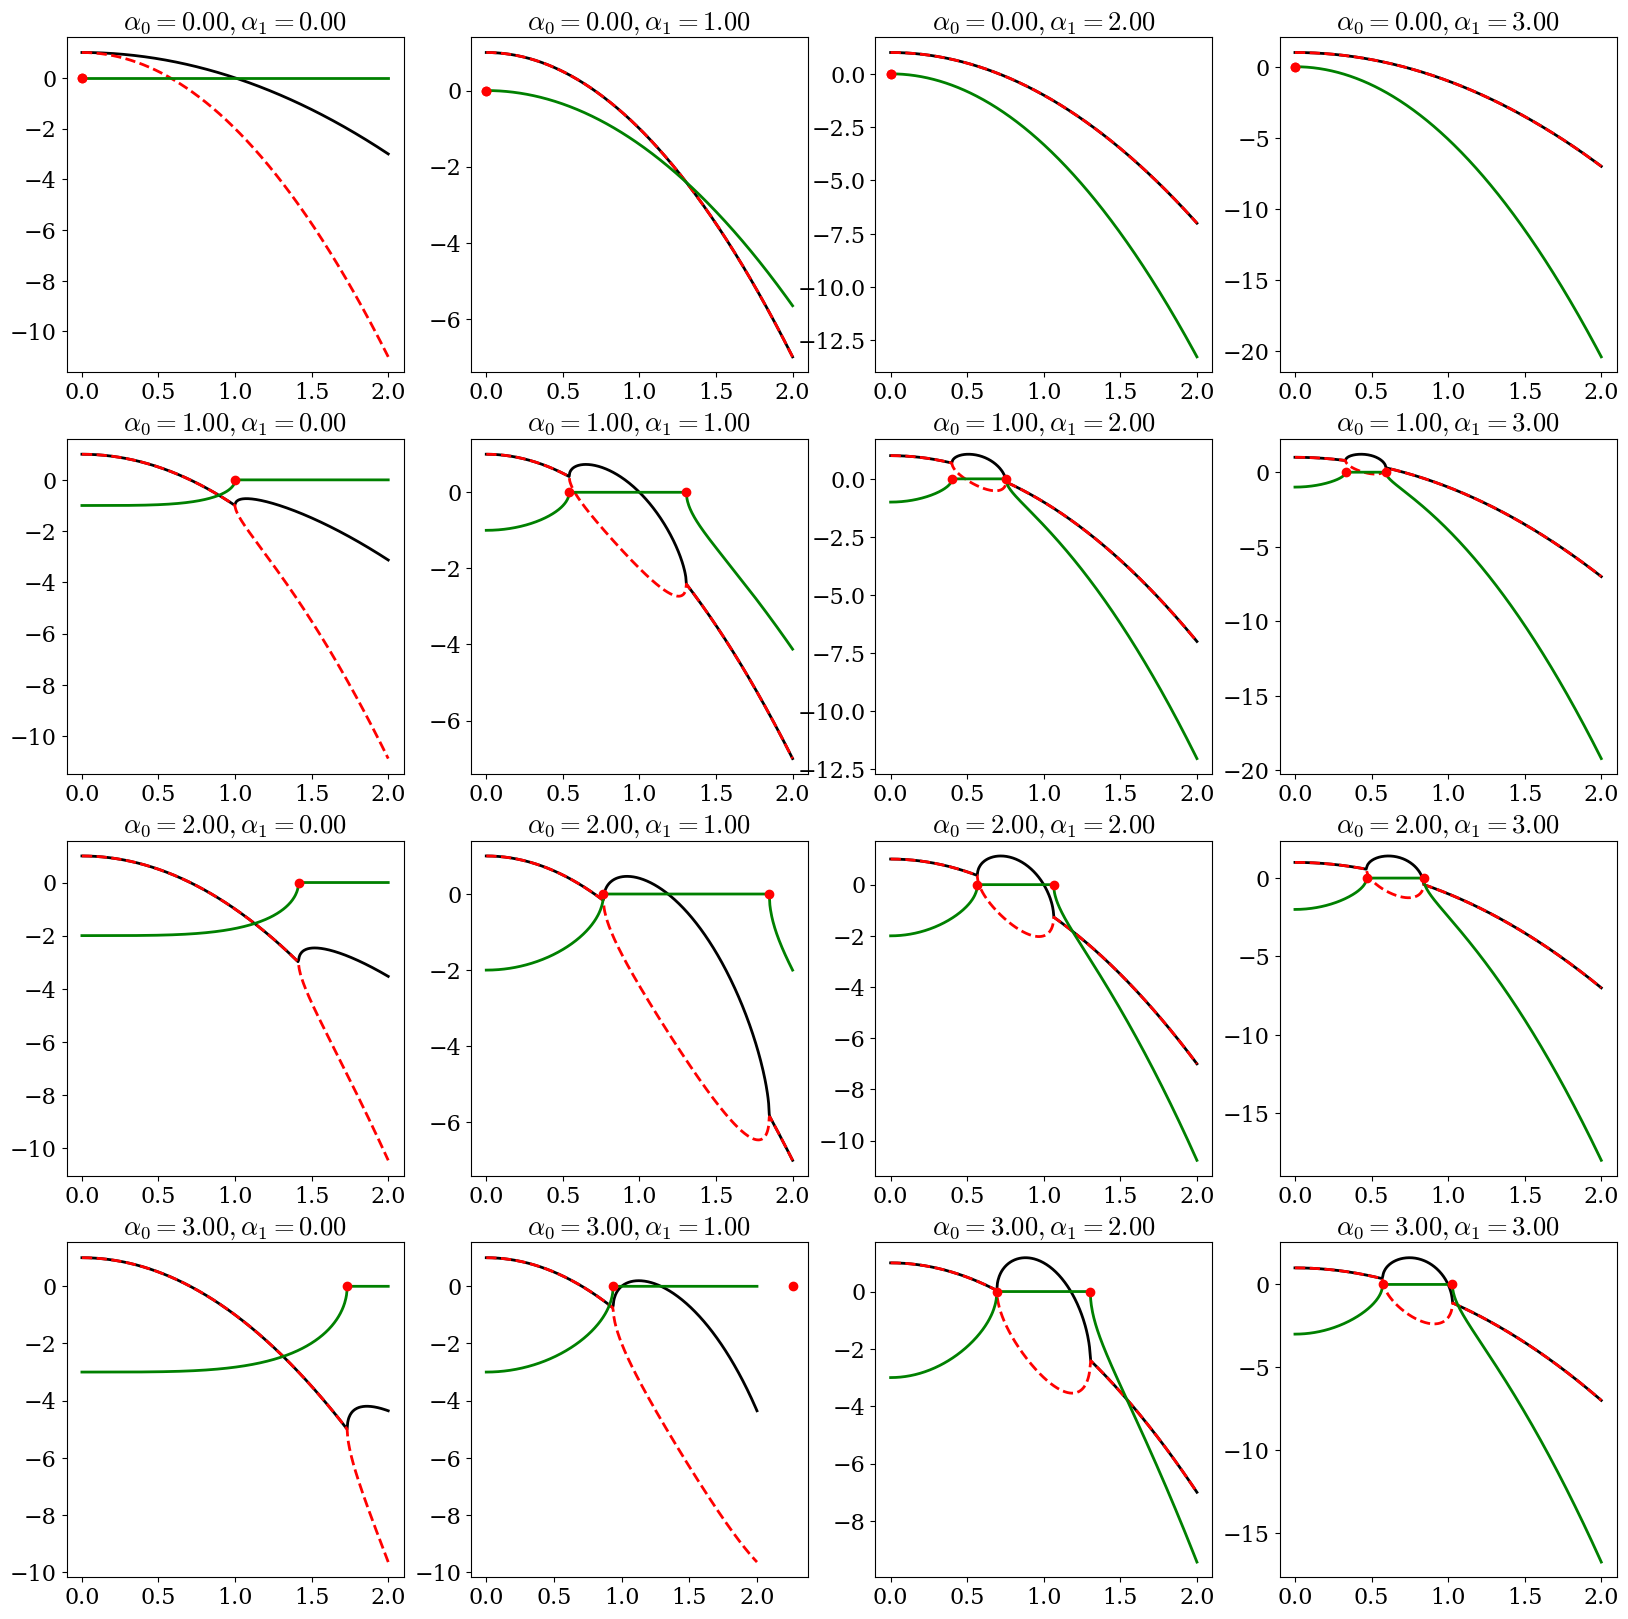

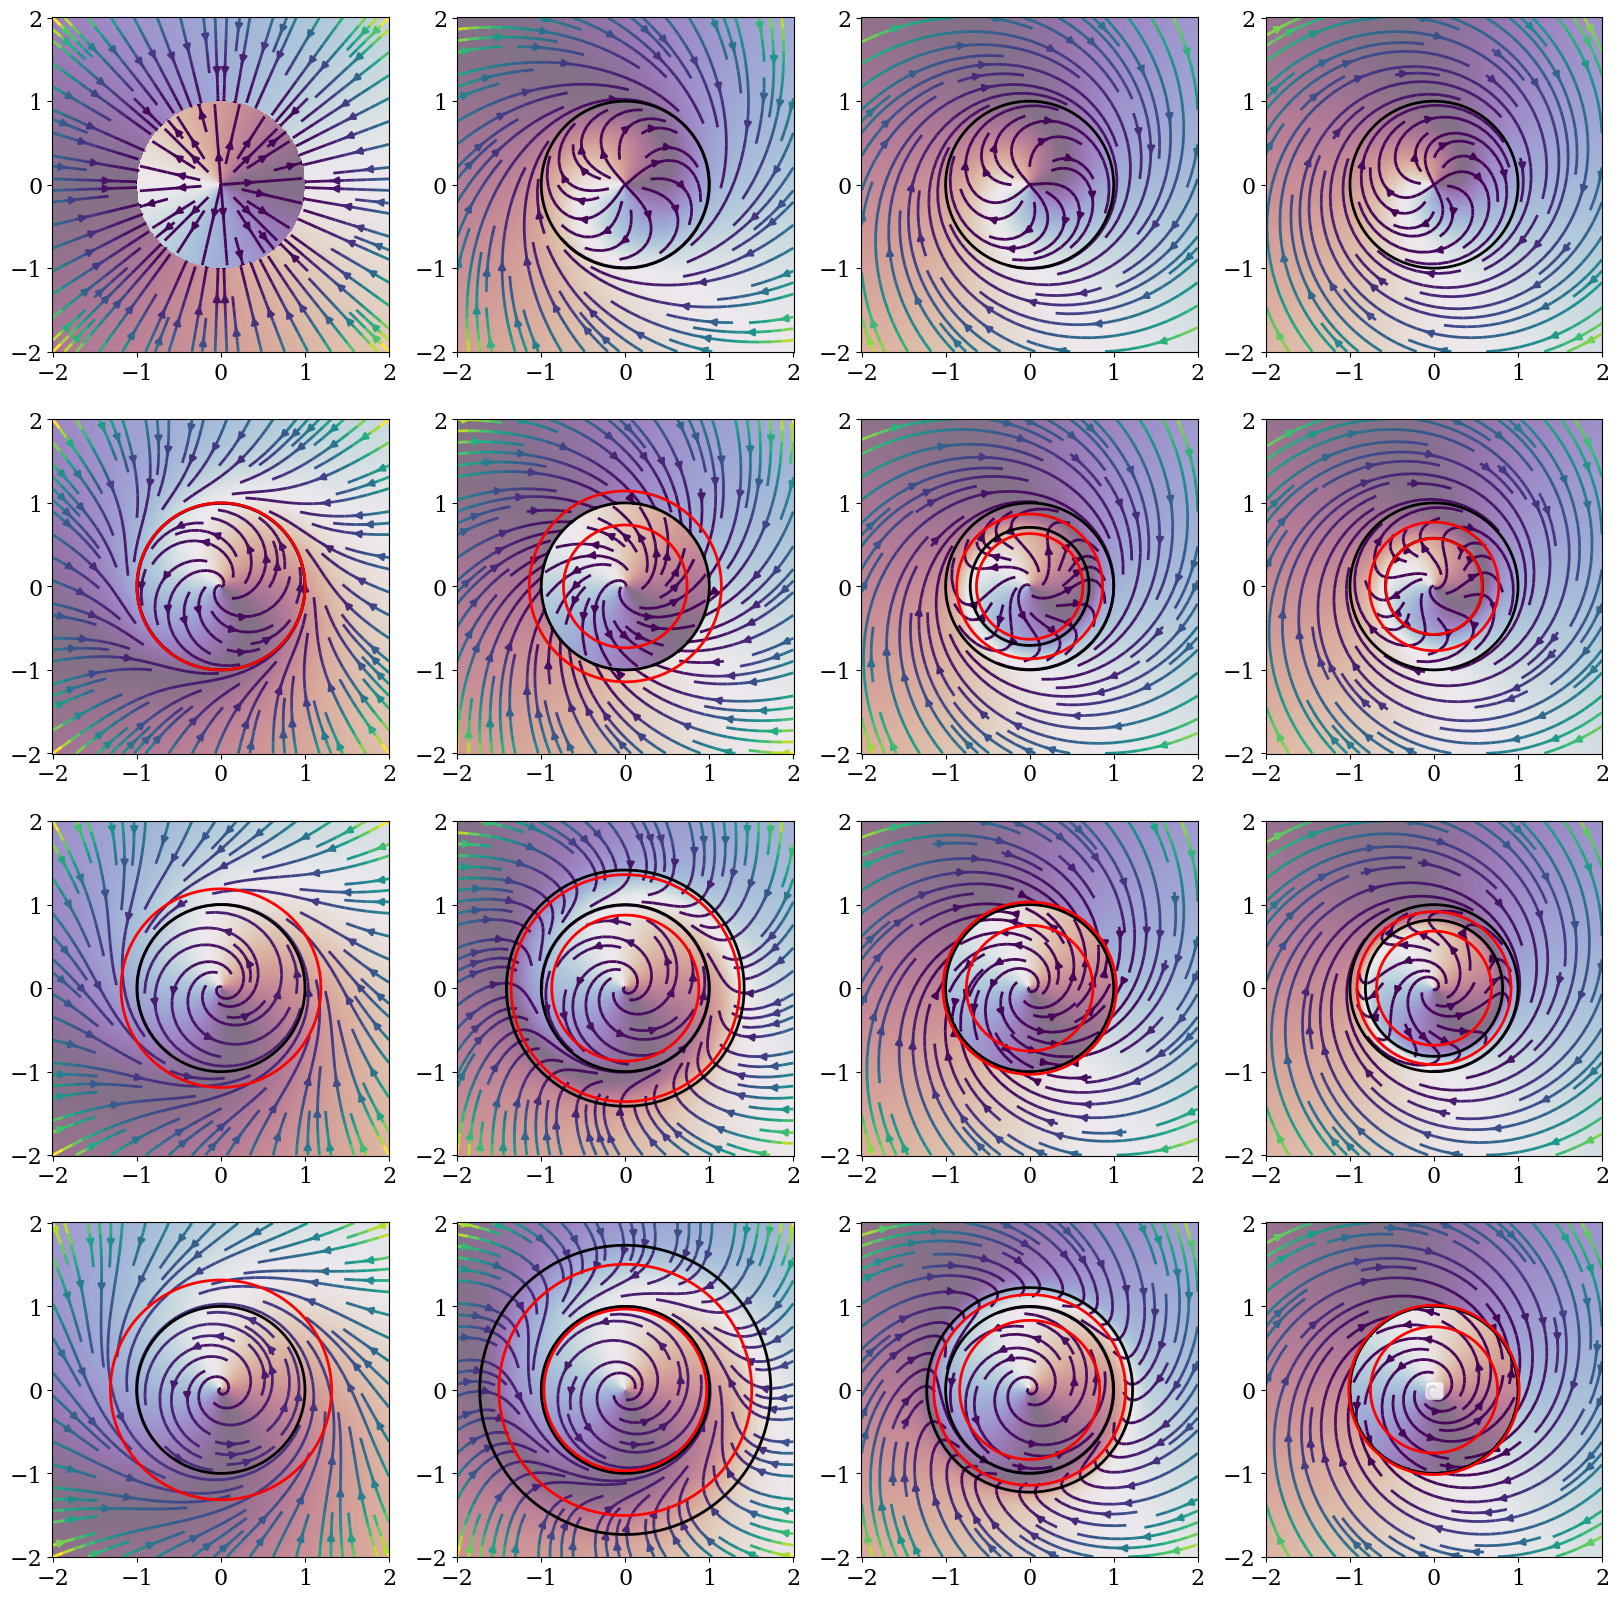

In [14]:
r = u = 1

fig, ax = plt.subplots(m, m, figsize=(20, 20))
fig2, ax2 = plt.subplots(m, m, figsize=(20, 20))

k = 2

phi = np.linspace(0, k, 500)

N = 400
x = np.linspace(-k, k, N)
y = np.linspace(-k, k, N)

x, y = np.meshgrid(x, y)
z = x + 1j * y

for i, (a0, a1) in enumerate(a):
    l = lambda x: l1(r, u, a0, a1, x)
    ll = lambda x: l2(r, u, a0, a1, x)

    n = (i%m, i//m)
    ax[n].plot(phi, ll(phi).real, 'k', label='Re $\\lambda_+$')
    ax[n].plot(phi, l(phi).real, 'r--', label='Re $\\lambda_-$')
    ax[n].plot(phi, l(phi).imag, 'green', label='Im $\\lambda_+$')
    title ="$\\alpha_0 = {:.2f}, \\alpha_1 = {:.2f}$".format(a0, a1)
    ax[n].set_title(title)

    phi0p = np.sqrt(a0/(3*a1**2-u**2) * (2*a1 + np.sqrt(a1**2 + u**2)))
    phi0m = np.sqrt(a0/(3*a1**2-u**2) * (2*a1 - np.sqrt(a1**2 + u**2)))
    ax[n].plot(phi0p, 0, 'ro')
    ax[n].plot(phi0m, 0, 'ro')


    f = lambda x: -( -(r+1j*a0) + (u+1j*a1)*np.abs(x)**2 ) * x
    w = f(z)

    v1, v2 = w.real, w.imag
    mod = np.sqrt(v1**2 + v2**2)
    theta = np.angle(w)
    ax2[n].streamplot(x, y, v1, v2, color=mod)
    ax2[n].pcolormesh(x, y, theta, cmap='twilight', alpha=.6)
    level1 = np.min((1., a0/a1))
    level2 = np.max((1., a0/a1))
    levels = [level1,]
    if level2!=level1: levels.append(level2)
    ax2[n].contour(x, y, x**2 + y**2, levels=levels, colors='black')
    
    levels = np.sort([phi0m, phi0p])
    ax2[n].contour(x, y, x**2 + y**2, levels=levels, colors='red')
    ax[n].set_title(title)




plt.legend()
plt.show()

In [16]:
m = 4
a = np.linspace(.5, 5, m)
a, b = np.meshgrid(a, -a)
a = a.flatten()
b = b.flatten()
a = list(zip(a, b))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


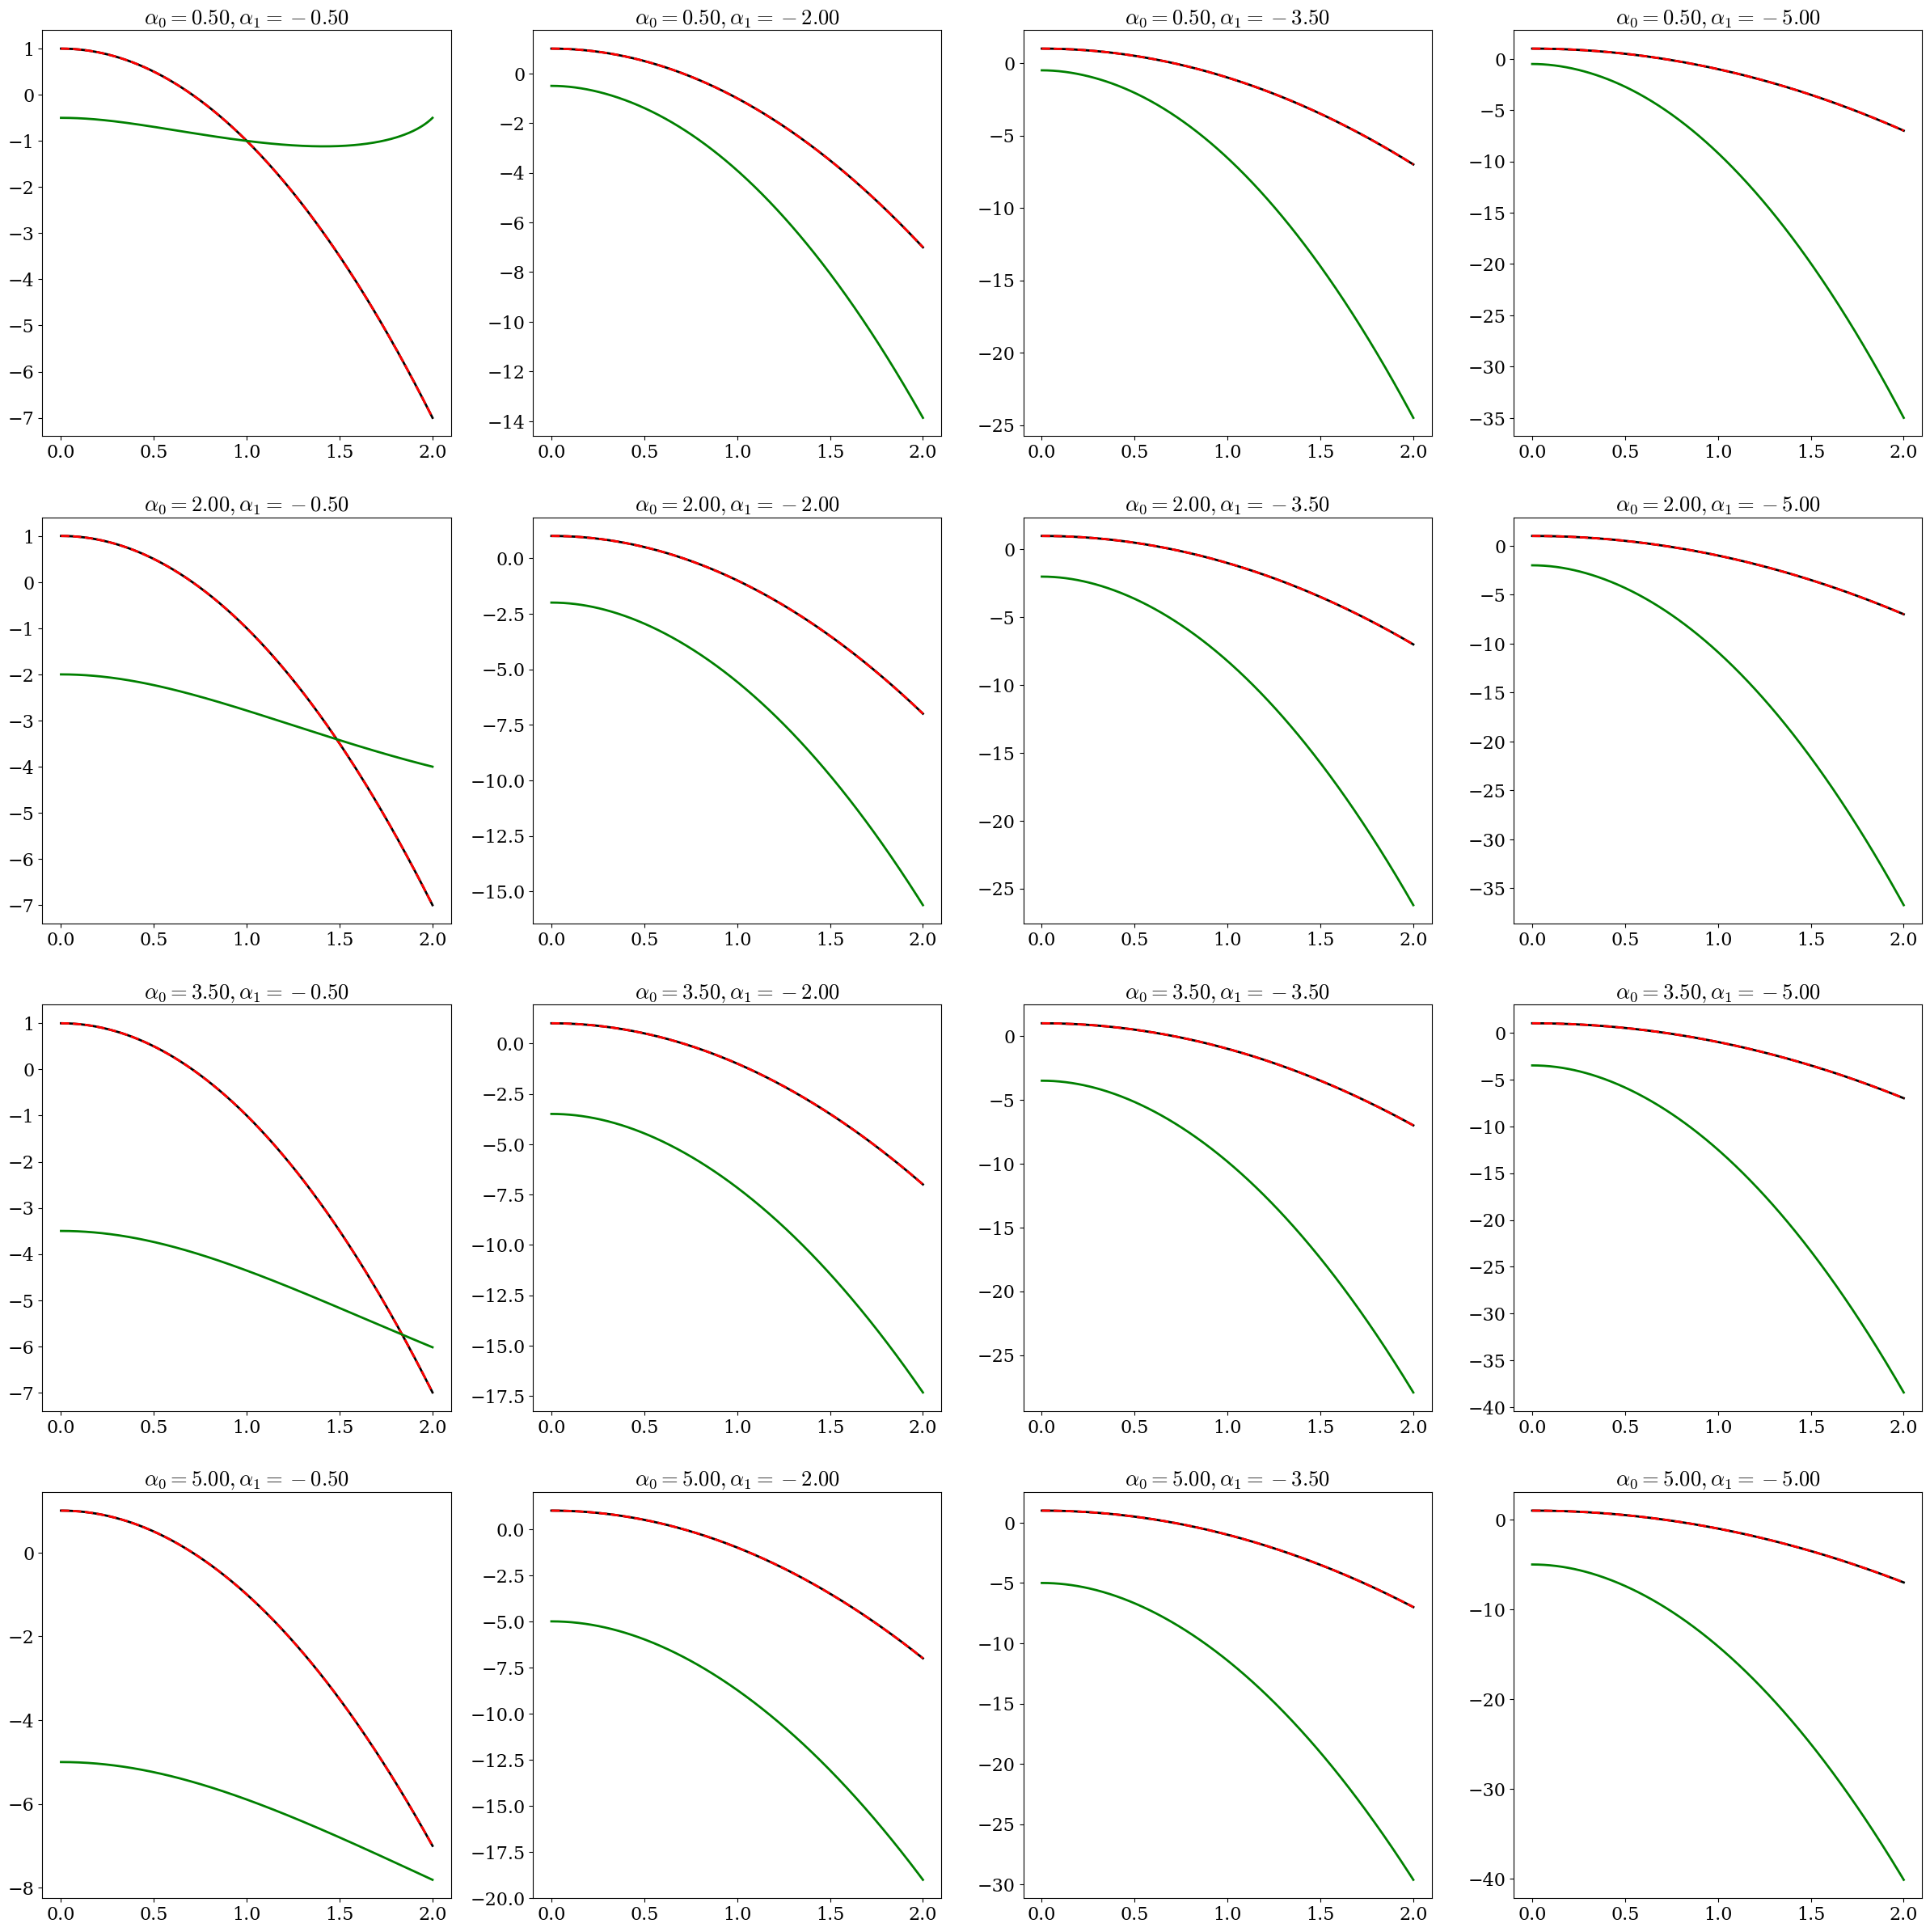

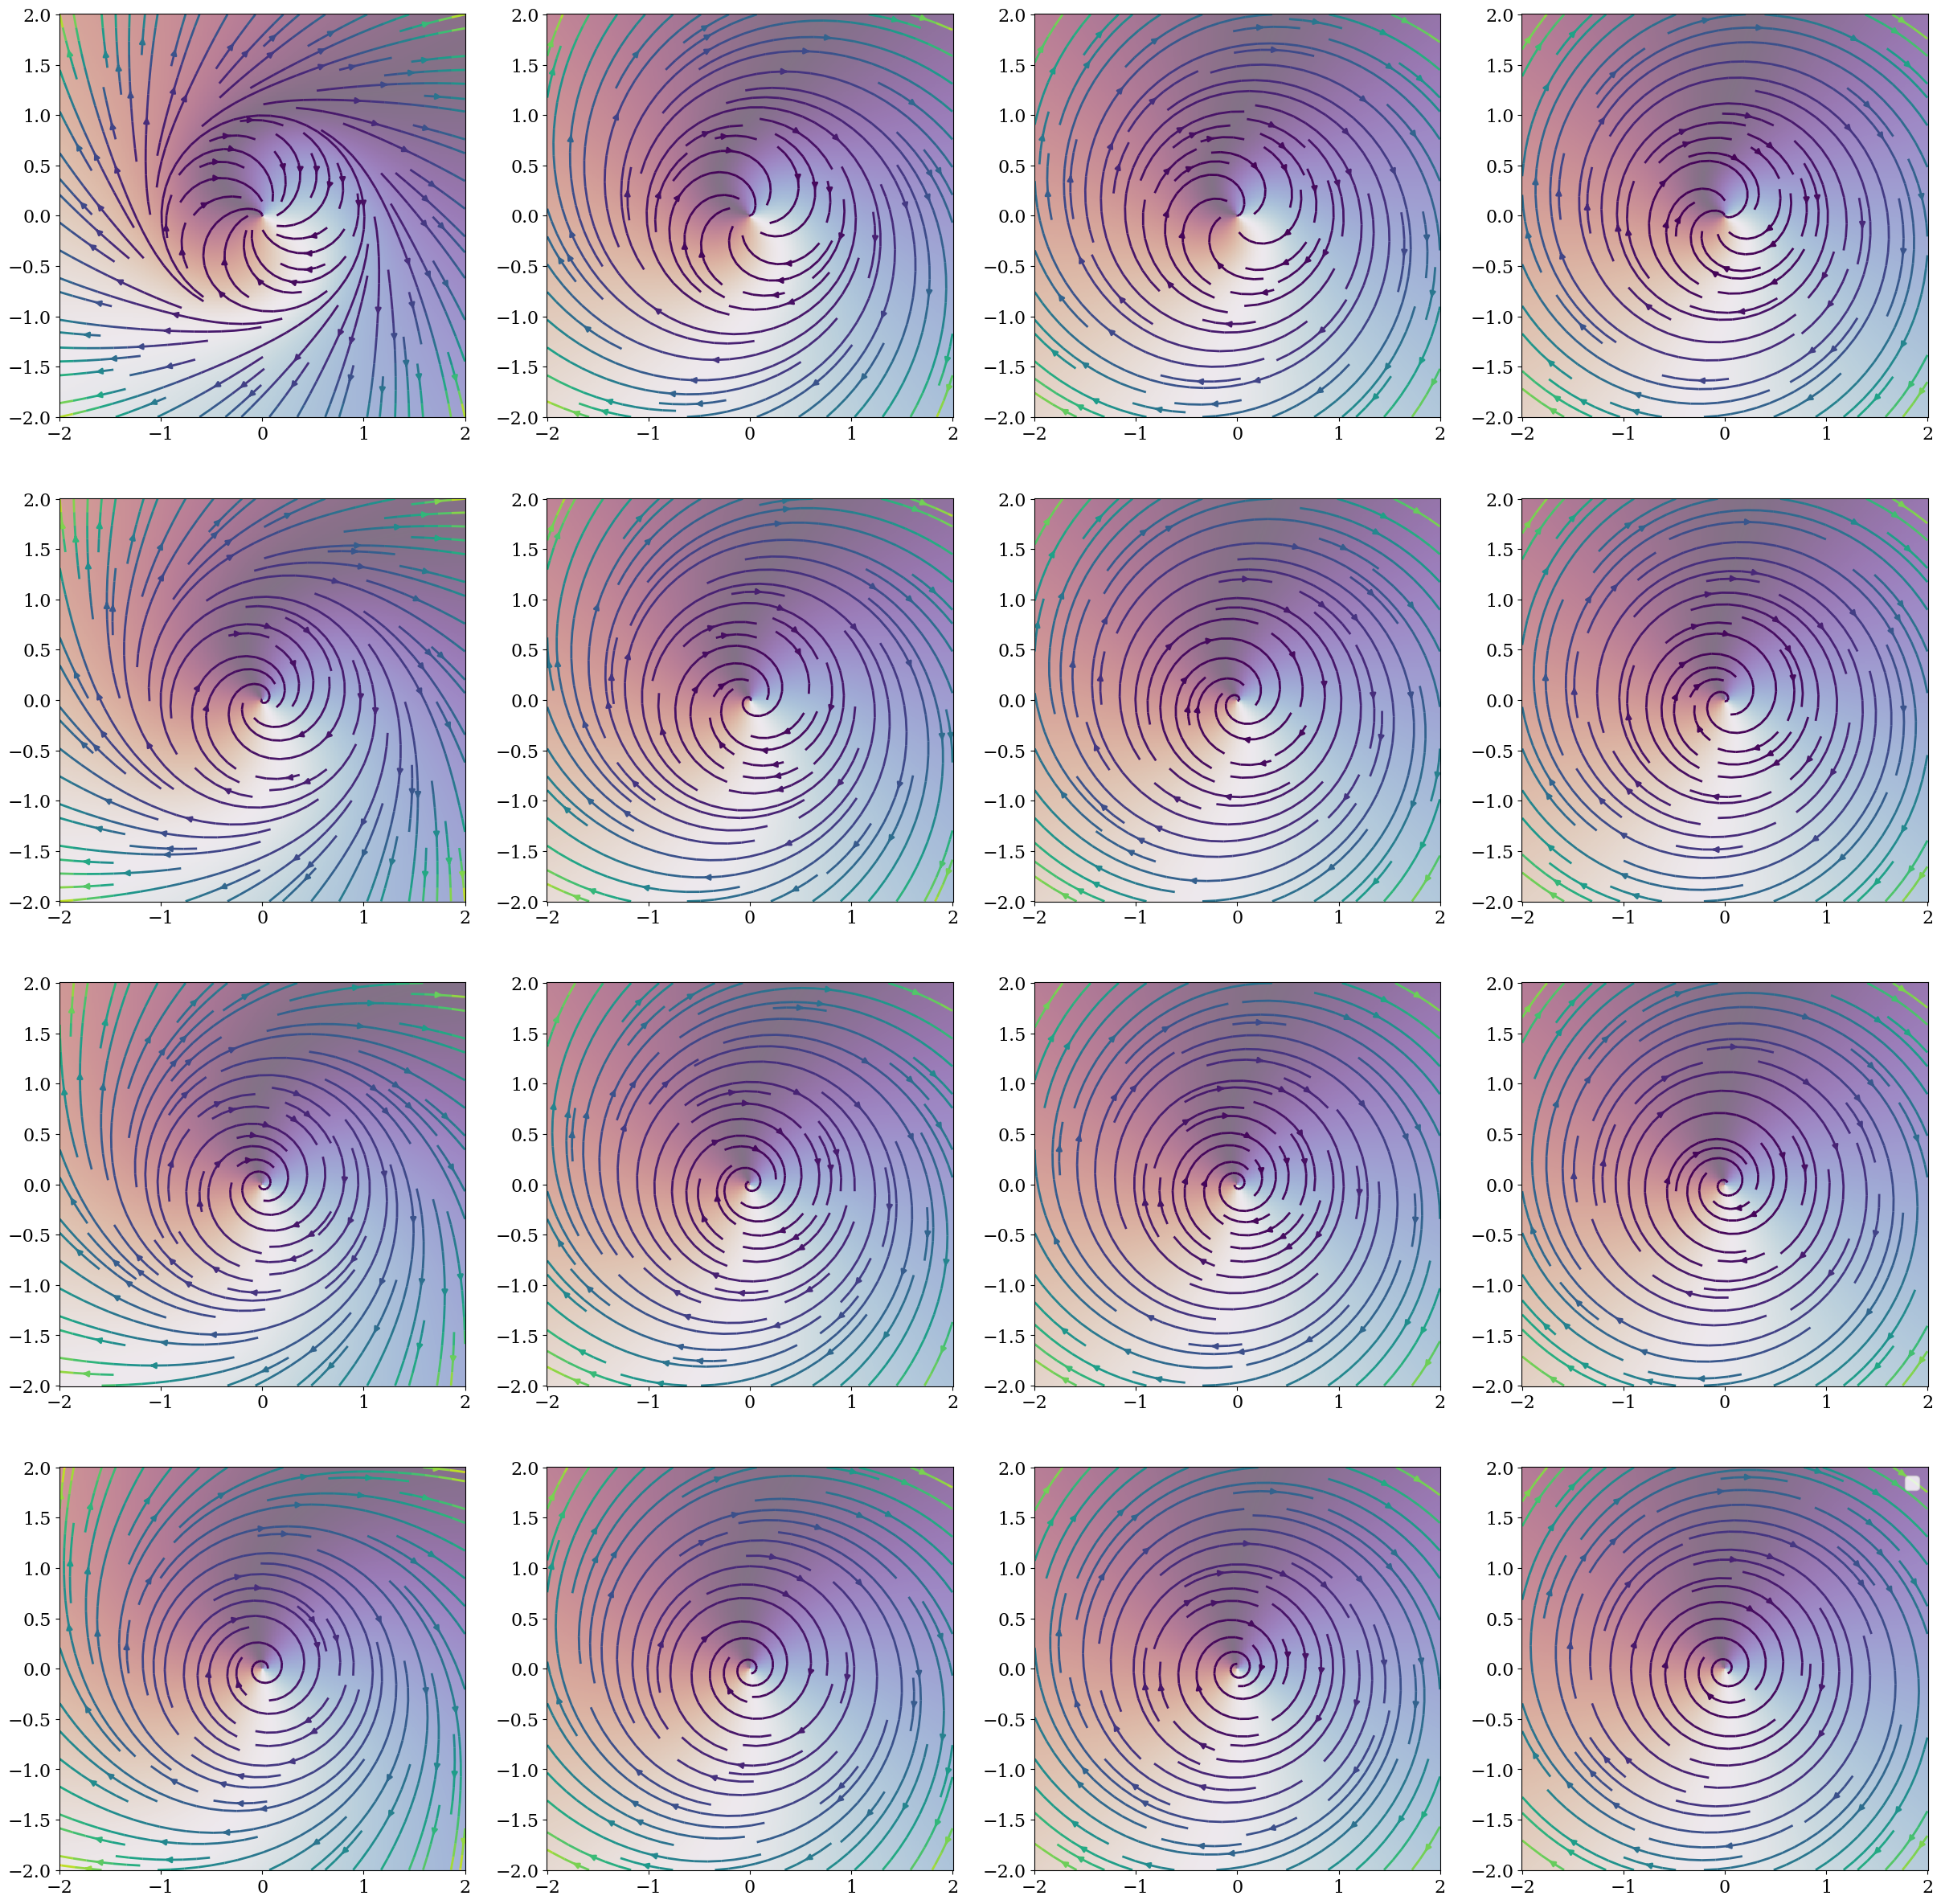

In [17]:
r = u = 1

fig, ax = plt.subplots(m, m, figsize=(30, 30))
fig2, ax2 = plt.subplots(m, m, figsize=(30, 30))



k = 2

phi = np.linspace(0, k, 500)

N = 400
x = np.linspace(-k, k, N)
y = np.linspace(-k, k, N)

x, y = np.meshgrid(x, y)
z = x + 1j * y


for i, (a0, a1) in enumerate(a):
    l = lambda x: l1(r, u, a0, a1, x)
    ll = lambda x: l2(r, u, a0, a1, x)

    n = (i%m, i//m)
    ax[n].plot(phi, ll(phi).real, 'k', label='Re $\\lambda_+$')
    ax[n].plot(phi, l(phi).real, 'r--', label='Re $\\lambda_-$')
    ax[n].plot(phi, l(phi).imag, 'green', label='Im $\\lambda_+$')
    title ="$\\alpha_0 = {:.2f}, \\alpha_1 = {:.2f}$".format(a0, a1)
    ax[n].set_title(title)


    f = lambda x: ( -(r+1j*a0) + (u+1j*a1)*np.abs(x)**2 ) * x
    w = f(z)

    v1, v2 = w.real, w.imag
    mod = np.sqrt(v1**2 + v2**2)
    theta = np.angle(w)
    ax2[n].streamplot(x, y, v1, v2, color=mod)
    ax2[n].pcolormesh(x, y, theta, cmap='twilight', alpha=.6)

plt.legend()
plt.show()

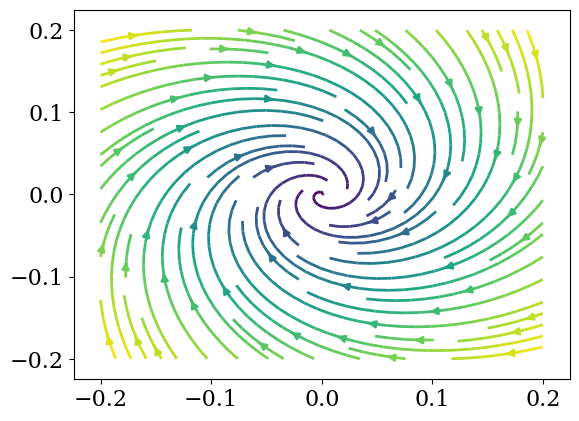

In [38]:
r = u = 1. +0j


k = .2
x = np.linspace(-k, k, 100)
y = np.linspace(-k, k, 100)


a0 = 2  +0j
a1 = 5. +0j

f = lambda x: ( -(r+1j*a0) + (u+1j*a1)*np.abs(x)**2 ) * x

x, y = np.meshgrid(x, y)
z = x + 1j * y

w = f(z)

u, v = w.real, w.imag
l = np.sqrt(u**2 + v**2)
plt.streamplot(x, y, u, v, color=l)
# plt.contour(x, y, l)